Imports

In [94]:
import matplotlib.pyplot as plt
import numpy as np

import functions
from gradient_solver import GradientDescentSolver

BETAS = [0.01, 0.007071, 0.005, 0.003535, 0.0025, 0.001768, 0.001, 0.000707, 0.0005, 0.000355, 0.0001, 0.0000707, 0.000050, 0.00003535, 0.000010]
RANDOM_ITERATIONS = 200
# ([1.0125586528493125, -1.4123706145514183], array([ 2., -3.])

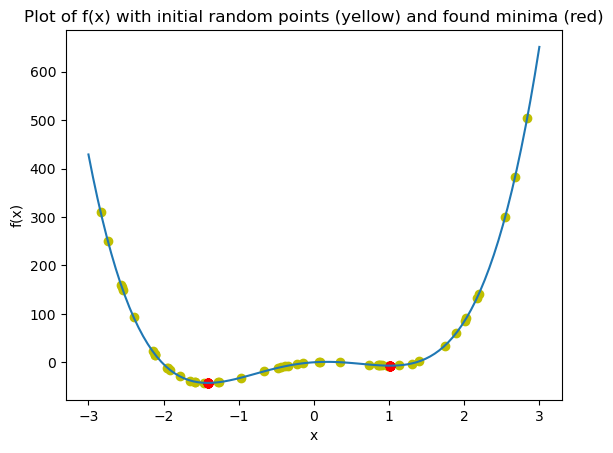

In [57]:
import random

x_min = -3
x_max = 3
plot = True

x = np.linspace(x_min, x_max, 100)
plt.plot(x, functions.f1([x]))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) with initial random points (yellow) and found minima (red)")

def solve_random_f1(iters: int = 50, beta: float = 0.001, plot: bool = True):
    values = []
    iter_nums = []
    for i in range(iters):
        x_rand = np.array([random.uniform(x_min, x_max)])

        solver = GradientDescentSolver(beta)
        found_min, i = solver.solve(x_rand, functions.grad_f1)
        if not np.isnan(found_min):
            values.append(found_min)
            iter_nums.append(i)

        if plot == True:
            plt.scatter(x_rand, functions.f1(x_rand), c='y', marker='o', alpha=1)
            # print(f'found minimum: {found_min} in {i}')
            plt.scatter(found_min, functions.f1(found_min), c='r', marker='o', alpha=1)
    return values, iter_nums

_, _ = solve_random_f1()

plt.show()

In [58]:

statistics = []
for beta in BETAS:
    values, iter_nums = solve_random_f1(RANDOM_ITERATIONS, beta, False)
    errors = RANDOM_ITERATIONS - len(values)
    global_found = 0
    for value in values:
        if abs(value - -1.412) < 0.1:
            global_found += 1
    beta_stats = {'beta': beta,
                    'mean': np.mean(values),
                    'std_dev': np.std(values),
                    'best_solution_val': np.min(values),
                    'mean_iter': np.mean(iter_nums),
                    'num_of_errors': errors,
                    'percent_of_correct': global_found/len(values)
                    }
    # print(beta_stats)
    statistics.append(beta_stats)

In [59]:
filtered_betas = []
means = []
iterations = []
std_devs = []
corrects =[]

errors = []

for i in range(len(statistics)):
    errors.append(statistics[i]['num_of_errors'])
    if statistics[i]['num_of_errors'] == 0:
        means.append(statistics[i]['mean'])
        iterations.append(statistics[i]['mean_iter'])
        std_devs.append(statistics[i]['std_dev'])
        corrects.append(statistics[i]['percent_of_correct'])
        filtered_betas.append(BETAS[i])

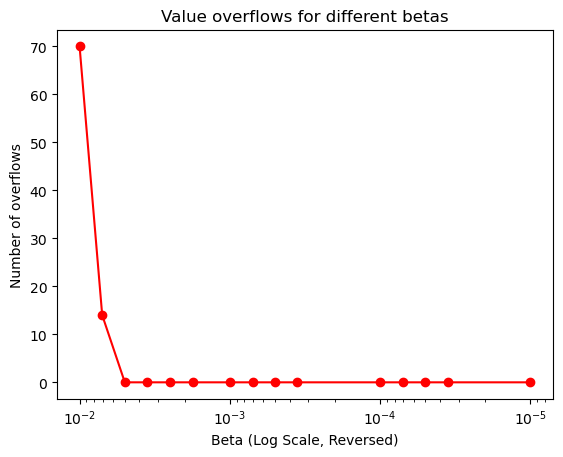

In [60]:
plt.semilogx(BETAS, errors, c='r',marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Number of overflows")
plt.title("Value overflows for different betas")
plt.show()

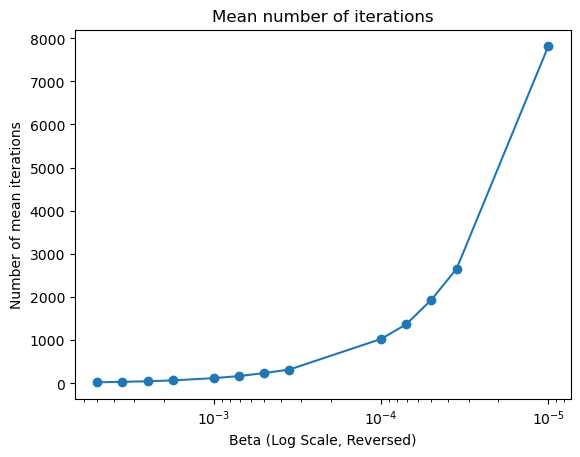

In [61]:
plt.semilogx(filtered_betas, iterations, marker='o')
# plt.semilogx(BETAS, std, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Number of mean iterations")
plt.title("Mean number of iterations")
plt.show()

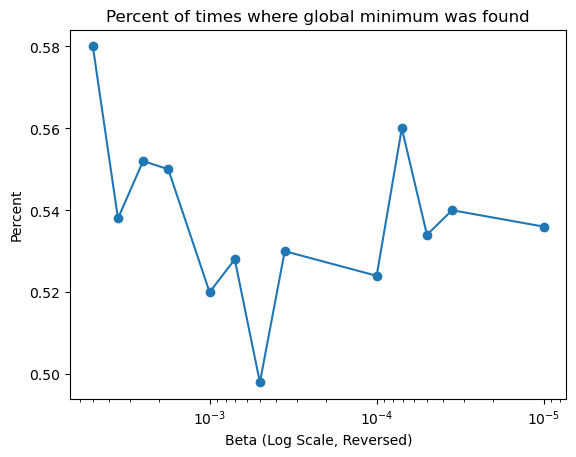

In [62]:
plt.semilogx(filtered_betas, corrects, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Percent")
plt.title("Percent of times where global minimum was found")
plt.show()

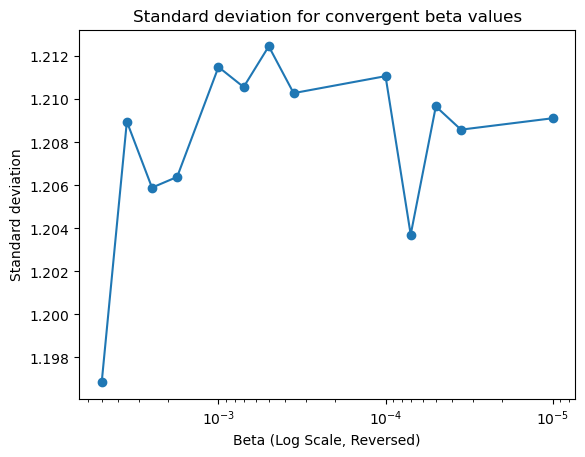

In [63]:
plt.semilogx(filtered_betas, std_devs, marker='o')
# plt.semilogx(BETAS, std, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Standard deviation")
plt.title("Standard deviation for convergent beta values")
plt.show()

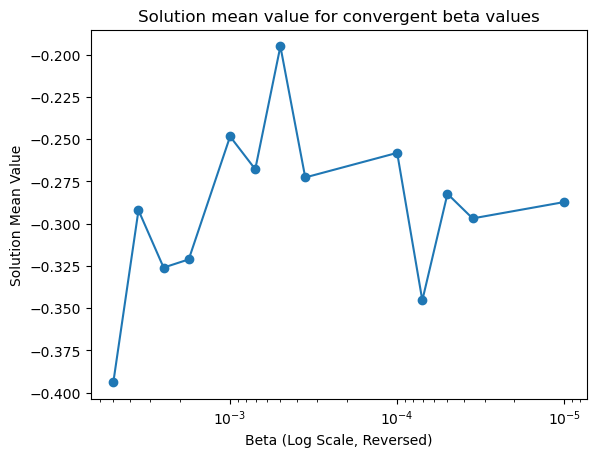

In [64]:
plt.semilogx(filtered_betas, means, marker='o')
# plt.semilogx(BETAS, std, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Solution Mean Value")
plt.title("Solution mean value for convergent beta values")
plt.show()

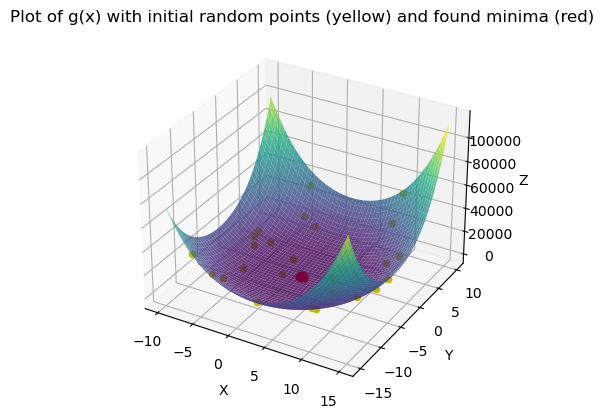

In [65]:
x_min, x_max = -10, 15
y_min, y_max = -15, 10

x = np.linspace(x_min, x_max, 1000)
y = np.linspace(y_min, y_max, 1000)
xx, yy = np.meshgrid(x, y)
zz = functions.f2([xx, yy])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.8)

for i in range(25):
    x_rand = np.array([random.uniform(x_min, x_max), random.uniform(y_min, y_max)])
    ax.scatter(x_rand[0], x_rand[1], functions.f2(x_rand), c='y', marker='o', alpha=1)

    solver = GradientDescentSolver()
    found_min, i = solver.solve(x_rand, functions.grad_f2)
    # print(f'found minimum: {found_min} in {i}')
    ax.scatter(found_min[0], found_min[1], functions.f2(found_min), c='r', marker='o',alpha=1)


plt.title("Plot of g(x) with initial random points (yellow) and found minima (red)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()

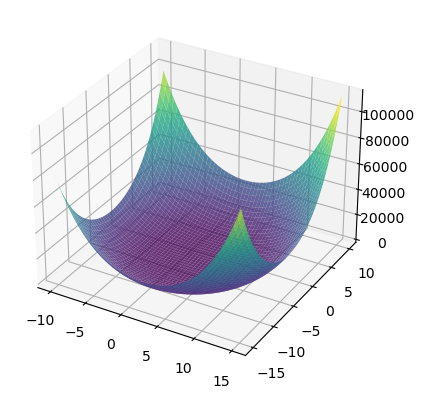

In [95]:
import random

x_min, x_max = -10, 15
y_min, y_max = -15, 10

x = np.linspace(x_min, x_max, 1000)
y = np.linspace(y_min, y_max, 1000)
xx, yy = np.meshgrid(x, y)
zz = functions.f2([xx, yy])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.8)

def solve_random_f2(iters: int = 50, beta: float = 0.001):
    values = []
    iter_nums = []
    for i in range(iters):
        x_rand = np.array([random.uniform(x_min, x_max), random.uniform(y_min, y_max)])

        solver = GradientDescentSolver(beta)
        found_min, i = solver.solve(x_rand, functions.grad_f1)
        if np.any(~np.isnan(found_min)):
            values.append(found_min)
            iter_nums.append(i)
    return values, iter_nums

_, _ = solve_random_f2()

In [96]:

statistics = []
for beta in BETAS:
    values, iter_nums = solve_random_f2(RANDOM_ITERATIONS, beta)
    errors = RANDOM_ITERATIONS - len(values)
    global_found = 0
    beta_stats = {'beta': beta,
                    'mean': np.mean(values),
                    'std_dev': np.std(values),
                    'best_solution_val': np.min(values),
                    'mean_iter': np.mean(iter_nums),
                    'num_of_errors': errors,
                    }
    print(beta_stats)
    statistics.append(beta_stats)

{'beta': 0.01, 'mean': -0.8803048907942016, 'std_dev': 5.211124404286891, 'best_solution_val': -15.635390946602293, 'mean_iter': 18.229166666666668, 'num_of_errors': 152}
{'beta': 0.007071, 'mean': -2.1090315725339717, 'std_dev': 5.4377341744347465, 'best_solution_val': -15.390955532133297, 'mean_iter': 13.89795918367347, 'num_of_errors': 151}
{'beta': 0.005, 'mean': -2.419631647878018, 'std_dev': 5.802048491351806, 'best_solution_val': -17.024619177408653, 'mean_iter': 21.61904761904762, 'num_of_errors': 137}
{'beta': 0.003535, 'mean': -2.364598052491881, 'std_dev': 5.5300327220729795, 'best_solution_val': -15.73494230723329, 'mean_iter': 30.655172413793103, 'num_of_errors': 142}
{'beta': 0.0025, 'mean': -1.897469915598697, 'std_dev': 5.5783558435293, 'best_solution_val': -16.05826696190546, 'mean_iter': 43.59375, 'num_of_errors': 136}
{'beta': 0.001768, 'mean': -2.5722694661727017, 'std_dev': 5.745862571138561, 'best_solution_val': -18.198066660976117, 'mean_iter': 65.46511627906976,

In [110]:
filtered_betas = []
means = []
iterations = []
std_devs = []
min_values = []

errors = []

for i in range(len(statistics)):
    errors.append(statistics[i]['num_of_errors'])
    min_values.append(statistics[i]['best_solution_val'])
    if statistics[i]['num_of_errors'] == 0:
        means.append(statistics[i]['mean'])
        iterations.append(statistics[i]['mean_iter'])
        std_devs.append(statistics[i]['std_dev'])
        filtered_betas.append(BETAS[i])

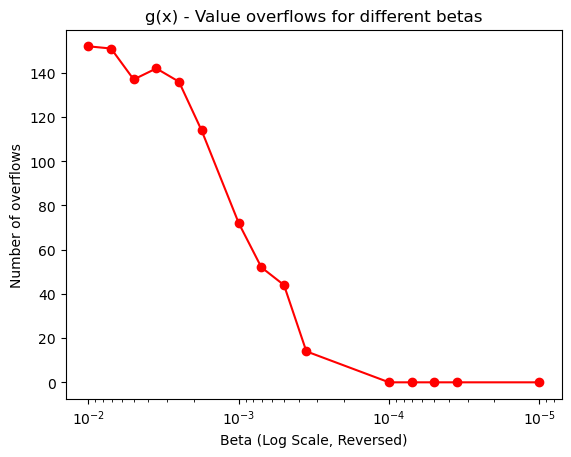

In [116]:
plt.semilogx(BETAS, errors, c='r',marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Number of overflows")
plt.title("g(x) - Value overflows for different betas")
plt.show()

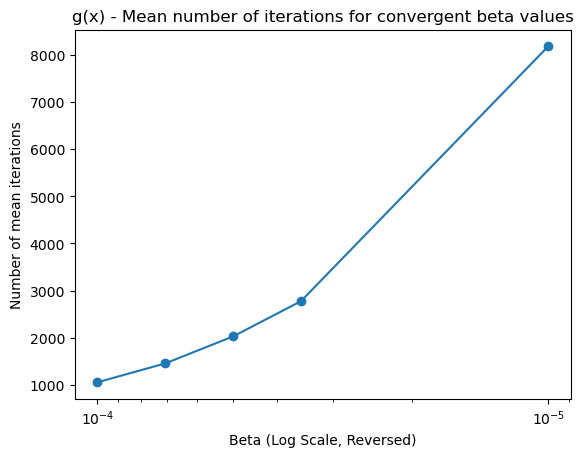

In [117]:
plt.semilogx(filtered_betas, iterations, marker='o')
# plt.semilogx(BETAS, std, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Number of mean iterations")
plt.title("g(x) - Mean number of iterations for convergent beta values")
plt.show()

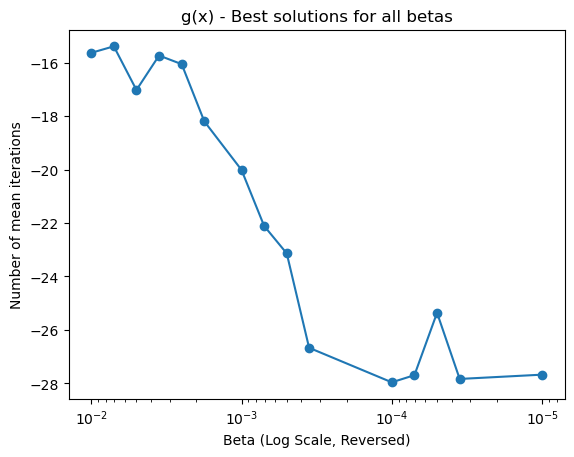

In [118]:
plt.semilogx(BETAS, min_values, marker='o')
# plt.semilogx(BETAS, std, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Number of mean iterations")
plt.title("g(x) - Best solutions for all betas")
plt.show()

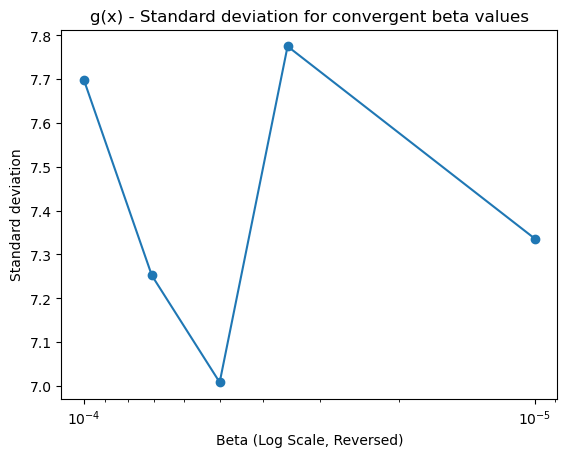

In [119]:
plt.semilogx(filtered_betas, std_devs, marker='o')
# plt.semilogx(BETAS, std, marker='o')

plt.gca().invert_xaxis()
plt.xlabel("Beta (Log Scale, Reversed)")
plt.ylabel("Standard deviation")
plt.title("g(x) - Standard deviation for convergent beta values")
plt.show()